First, download medical_mnist.zip from Kaggle
https://www.kaggle.com/datasets/andrewmvd/medical-mnist
or from dropbox
https://www.dropbox.com/scl/fi/wql10vir4zk5mppc88nl8/medical_mnist.zip?rlkey=majqo92r2g5uejqmsnmlo0l5j&dl=0
unzip the data to Exercise2 / mmnist/

import all the helper functions

In [1]:
from utils_mnist import *
import numpy as np

In [2]:
class Trainer():  #Trainer class 用來訓練用的
    def __init__(self, args, train_loader, validation_loader, model, loss_function, optimizer):
        pass

    def overall_loop(self):
        for epoch in range(args['num_epochs']):
            train_loss = self.training_loop(train_loader)  # do the training look
            validation_loss = self.validation_loop(validation_loader) # do the validation loop
            # print out the training and validation loss per epoch
            print('Epoch [{}/{}], Train Loss: {:.4f}, Validation Loss: {:.4f}'
                  .format(epoch + 1, args['num_epochs'],
                          sum(train_loss) / len(train_loss), sum(validation_loss) / len(validation_loss)))

    def training_loop(self, train_loader):
        train_loss = []
        for i, train_batch in enumerate(train_loader):  # get mini-bacthes from the train_loader
            loss = self.training_step(train_batch) # get the train loss from the train_step
        train_loss.append(loss.item()) # add the train_loss up
        return train_loss

    def validation_loop(self, validation_loader):
        validation_loss = []
        for i, validation_batch in enumerate(validation_loader):
            loss = self.validation_step(validation_batch)
        validation_loss.append(loss.item())
        return validation_loss

    def training_step(self, train_batch):
        (images, labels) = train_batch
        images = images.reshape(-1, args['img_size'])  # turn the 2D image to a 1D feature (flatten)

        # Forward pass
        outputs = model(images)  # get the model output
        loss = loss_function(outputs, labels) # calculate the loss

        # Magic section where we do optimization by backpropogation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        return loss

    def validation_step(self, validation_batch):
        ###
        loss = 0  #如果甚麼都不寫也可回傳。
        # YOUR CODE HERE
        # Borrow the lines from the training_step function to calculate the validation loss, but no optimization!
        (images, labels) = validation_batch
        images = images.reshape(-1, args['img_size'])  # turn the 2D image to a 1D feature (flatten)

        # Forward pass
        outputs = model(images)  # get the model output
        loss = loss_function(outputs, labels) # calculate the loss
        ###
        
        return loss

define all the arguments (hyperparameters)

In [3]:
# arguments
def get_arguments():
    # Hyper-parameters
    args = {'img_size': 64 * 64,
            'num_classes': 10,
            'num_epochs': 50,
            'batch_size': 16,
            'learning_rate': 0.001,
            'model': 'logistic_regression'} # MLP or logistic_regression
    return args

args = get_arguments()
print(args)

{'img_size': 4096, 'num_classes': 10, 'num_epochs': 50, 'batch_size': 16, 'learning_rate': 0.001, 'model': 'logistic_regression'}


In [4]:
# Medical MNIST dataset (images and labels)
train_loader, validation_loader = get_medical_mnist(args=args)
print('Done with data preparation')

data folder:  mmnist/
['mmnist\\AbdomenCT', 'mmnist\\BreastMRI', 'mmnist\\CXR', 'mmnist\\ChestCT']
length of all images: 28000
['mmnist\\AbdomenCT', 'mmnist\\BreastMRI', 'mmnist\\CXR', 'mmnist\\ChestCT']
length of all images: 10218
Done with data preparation


In [5]:
print('Length of train dataset:')
print(len(train_loader.dataset))
print('Length of validation dataset:')
print(len(validation_loader.dataset))
print('Length of train dataloader:')
print(len(train_loader))
print('Length of validation dataloader:')
print(len(validation_loader))
print('Why is that?')

Length of train dataset:
28000
Length of validation dataset:
10218
Length of train dataloader:
1750
Length of validation dataloader:
639
Why is that?


Let's look at some images

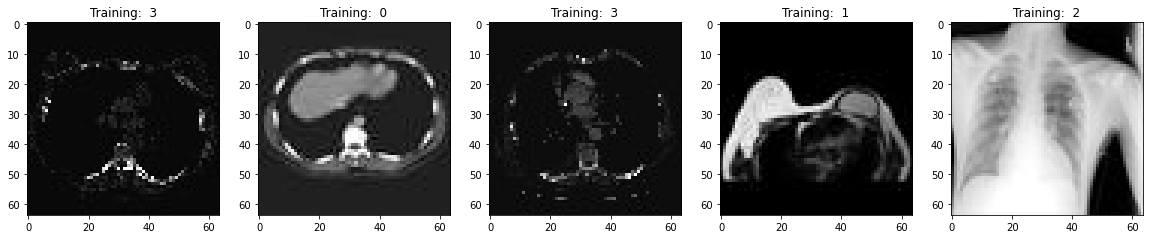

In [6]:
some_index = np.random.randint(0, len(train_loader.dataset), 10)
some_imgs = [train_loader.dataset.__getitem__(idx)[0] for idx in some_index]
some_labels = [train_loader.dataset.__getitem__(idx)[1] for idx in some_index]

show_examples(some_imgs[:5], some_labels[:5])

In [7]:
# get model
if args['model'] == 'logistic_regression':
    print('Using logistic regression')
    model = nn.Linear(args['img_size'], args['num_classes'])
elif args['model'] == 'MLP':
    print('MLP')
    model = MLP(dropout=0, hidden_1=512, hidden_2=512)

Using logistic regression


In [8]:
# Loss and optimizer
loss_function = nn.CrossEntropyLoss() # this combined the LogSoftmax and NLLLoss
optimizer = torch.optim.SGD(model.parameters(), lr=args['learning_rate'])

Lets build the trainer together

In [9]:
trainer = Trainer(args, train_loader, validation_loader, model, loss_function, optimizer)

Start the training!

In [10]:
trainer.overall_loop()

Epoch [1/50], Train Loss: 0.2854, Validation Loss: 0.3468
Epoch [2/50], Train Loss: 0.2269, Validation Loss: 0.1855
Epoch [3/50], Train Loss: 0.0987, Validation Loss: 0.1235
Epoch [4/50], Train Loss: 0.1559, Validation Loss: 0.1309
Epoch [5/50], Train Loss: 0.0371, Validation Loss: 0.1010
Epoch [6/50], Train Loss: 0.0965, Validation Loss: 0.0772
Epoch [7/50], Train Loss: 0.0895, Validation Loss: 0.0641
Epoch [8/50], Train Loss: 0.0436, Validation Loss: 0.0674
Epoch [9/50], Train Loss: 0.0483, Validation Loss: 0.0598
Epoch [10/50], Train Loss: 0.0499, Validation Loss: 0.0570
Epoch [11/50], Train Loss: 0.0412, Validation Loss: 0.0596
Epoch [12/50], Train Loss: 0.0732, Validation Loss: 0.0567
Epoch [13/50], Train Loss: 0.0276, Validation Loss: 0.0582
Epoch [14/50], Train Loss: 0.0178, Validation Loss: 0.0490
Epoch [15/50], Train Loss: 0.0369, Validation Loss: 0.0474
Epoch [16/50], Train Loss: 0.0609, Validation Loss: 0.0497
Epoch [17/50], Train Loss: 0.0262, Validation Loss: 0.0411
Epoch 

Calculating validation accuracy

TypeError: 'DataLoader' object is not subscriptable

In [43]:
correct = 0
total = 0
for images, labels in validation_loader:
    images = images.reshape(-1, args['img_size'])
    outputs = model(images)
   
    ##### YOUR CODE HERE
    # print(outputs.data)
    predicted = torch.max(outputs.data, 1)  #torchmax 輸出 10個class中最大機率的那一籃index。 
    # dimension 第一維，第0維是loader一個batch裡面的Case   第1維是該Case裡面對不同class預測的機率高低
    # print(predicted)
    # print(labels)
    
    correct += torch.sum(predicted.indices == labels).item()
    total += labels.size(0) #這一輪的總case數
    #XXXXXX = torch.max(outputs.data, 1)
    #total += XXXXXX
    #correct += XXXXXX
    ##### YOUR CODE HERE
print(correct)
print(total)

print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

10054
10218
Accuracy of the model on the 10000 test images: 98.39498923468389 %


In [29]:
predicted.indices

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
predicted.indices.size(0)

16

In [41]:

torch.sum(predicted.indices == labels).item()

16